## Distribuciones de probabilidad
Las distribuciones de probabilidad teóricas son útiles en la inferencia estadística porque sus propiedades y características son conocidas. Si la distribución real de un conjunto de datos dado es razonablemente cercana a la de una distribución de probabilidad teórica, muchos de los cálculos se pueden realizar en los datos reales utilizando hipótesis extraídas de la distribución teórica.

In [98]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom, norm, poisson, geom, hypergeom, bernoulli, norm, uniform, lognorm, expon, gamma, beta, chi2, t, pareto

### Histograma
Muestra las frecuencias de un suceso

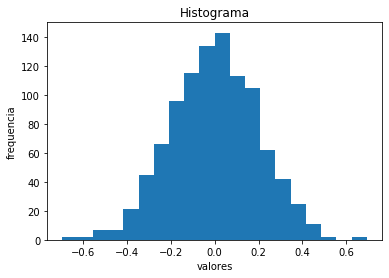

In [55]:
mu, sigma = 0, 0.2 # media y desvio estandar
datos = np.random.normal(mu, sigma, 1000) #creando muestra de datos

cuenta, cajas, ignorar = plt.hist(datos, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma')
plt.show()

## Función masa de probabilidad
Relaciona cada valor con su probabilidad en lugar de su frecuencia, funciona para valores pequeños

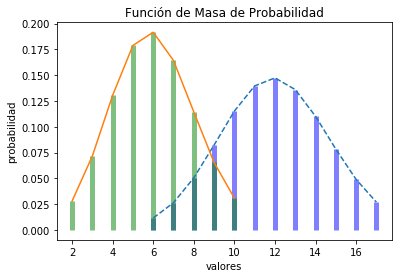

In [56]:
# Graficando FMP
n, p = 30, 0.4 # parametros de forma de la distribución binomial
n_1, p_1 = 20, 0.3 # parametros de forma de la distribución binomial
x = np.arange(binom.ppf(0.01, n, p),
              binom.ppf(0.99, n, p))
x_1 = np.arange(binom.ppf(0.01, n_1, p_1),
              binom.ppf(0.99, n_1, p_1))
fmp = binom.pmf(x, n, p) # Función de Masa de Probabilidad
fmp_1 = binom.pmf(x_1, n_1, p_1) # Función de Masa de Probabilidad
plt.plot(x, fmp, '--')
plt.plot(x_1, fmp_1)
plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
plt.vlines(x_1, 0, fmp_1, colors='g', lw=5, alpha=0.5)
plt.title('Función de Masa de Probabilidad')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

### Función de distribución de probabilidad acumulada
Si queremos evitar los problemas que se generan con FMP cuando el número de valores es muy grande

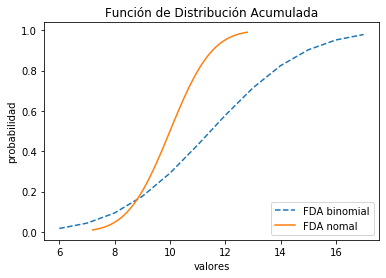

In [57]:
x_1 = np.linspace(norm(10, 1.2).ppf(0.01),
                  norm(10, 1.2).ppf(0.99), 100)
fda_binom = binom.cdf(x, n, p) # Función de Distribución Acumulada
fda_normal = norm(10, 1.2).cdf(x_1) # Función de Distribución Acumulada
plt.plot(x, fda_binom, '--', label='FDA binomial')
plt.plot(x_1, fda_normal, label='FDA nomal')
plt.title('Función de Distribución Acumulada')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.legend(loc=4)
plt.show()

### Función de densidad de probabilidad
Describe la probabilidad relativa según la cual dicha variable aleatoria tomará determinado valor.

Es el equivalente a la FMP para distribuciones continuas

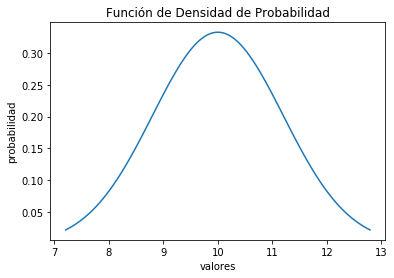

In [38]:
FDP_normal = norm(10, 1.2).pdf(x_1) # FDP
plt.plot(x_1, FDP_normal, label='FDP nomal')
plt.title('Función de Densidad de Probabilidad')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

# Distribuciones discretas
Las distribuciones discretas son aquellas en las que la variable puede tomar solo algunos valores determinados. Los principales exponentes de este grupo son las siguientes:

## Distribución de poisson

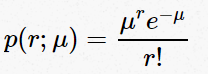

En dónde r es un entero (r≥0) y μ es un número real positivo. 

La Distribución Poisson describe la probabilidad de encontrar exactamente **r eventos en un lapso de tiempo** si los acontecimientos se producen de forma independiente a una velocidad constante μ.

Usada para describir el número de fallos en un lote de materiales o la cantidad de llegadas por hora a un centro de servicios.

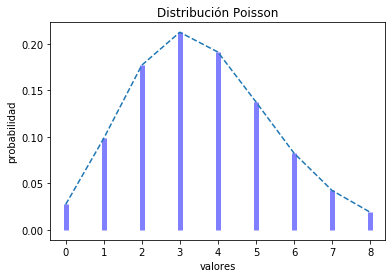

In [39]:
mu =  3.6 # parametro de forma 
poisson = poisson(mu) # Distribución
x = np.arange(poisson.ppf(0.01),
              poisson.ppf(0.99))
fmp = poisson.pmf(x) # Función de Masa de Probabilidad
plt.plot(x, fmp, '--')
plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
plt.title('Distribución Poisson')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

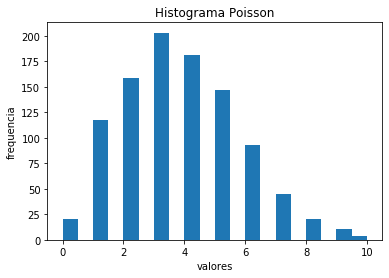

In [40]:
# histograma
aleatorios = poisson.rvs(1000)  # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Poisson')
plt.show()

## Distribución de Bernoulli

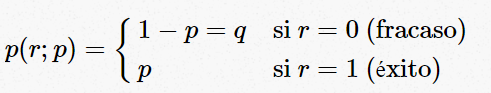

En dónde el parámetro p es la probabilidad de éxito en un solo ensayo, la probabilidad de fracaso por lo tanto va a ser 1−p (muchas veces expresada como q). Tanto p como q van a estar limitados al intervalo de cero a uno.

La Distribución de Bernoulli describe un **experimento probabilístico en donde el ensayo tiene dos posibles resultados, éxito o fracaso.**

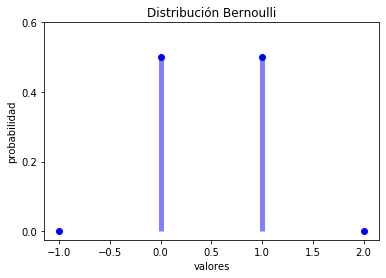

In [59]:
# Graficando Bernoulli
p =  0.5 # parametro de forma 
bernoulli = bernoulli(p)
x = np.arange(-1, 3)
fmp = bernoulli.pmf(x) # Función de Masa de Probabilidad
fig, ax = plt.subplots()
ax.plot(x, fmp, 'bo')
ax.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
ax.set_yticks([0., 0.2, 0.4, 0.6])
plt.title('Distribución Bernoulli')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

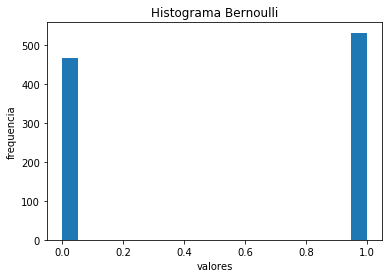

In [60]:
# histograma
aleatorios = bernoulli.rvs(1000)  # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Bernoulli')
plt.show()

## Distribución Binomial
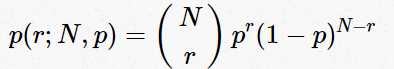

En dónde r con la condición 0≤r≤N y el parámetro N (N>0) son enteros; y el parámetro p (0≤p≤1) es un número real.

La Distribución Binomial describe la probabilidad de exactamente r éxitos en N pruebas si la probabilidad de éxito en una sola prueba es p.

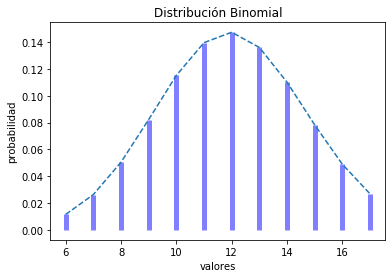

In [41]:
# Graficando Binomial
N, p = 30, 0.4 # parametros de forma 
binomial = binom(N, p) # Distribución
x = np.arange(binomial.ppf(0.01),
              binomial.ppf(0.99))
fmp = binomial.pmf(x) # Función de Masa de Probabilidad
plt.plot(x, fmp, '--')
plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
plt.title('Distribución Binomial')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

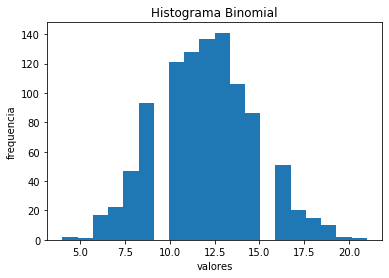

In [42]:
# histograma
aleatorios = binomial.rvs(1000)  # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Binomial')
plt.show()

## Distribución Geométrica

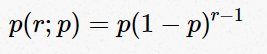

En dónde r≥1 y el parámetro p (0≤p≤1) es un número real.

La Distribución Geométrica expresa la probabilidad de tener que esperar exactamente r pruebas hasta encontrar el primer éxito si la probabilidad de éxito en una sola prueba es p. Por ejemplo, en un proceso de selección, podría definir el número de entrevistas que deberíamos realizar antes de encontrar al primer candidato aceptable.

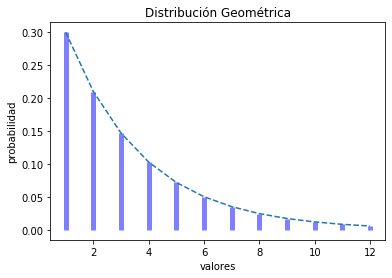

In [43]:
# Graficando Geométrica
p =  0.3 # parametro de forma 
geometrica = geom(p) # Distribución
x = np.arange(geometrica.ppf(0.01),
              geometrica.ppf(0.99))
fmp = geometrica.pmf(x) # Función de Masa de Probabilidad
plt.plot(x, fmp, '--')
plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
plt.title('Distribución Geométrica')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

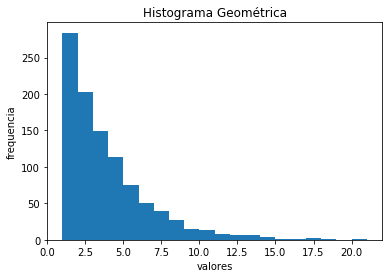

In [44]:
# histograma
aleatorios = geometrica.rvs(1000)  # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Geométrica')
plt.show()

## Distribución Hipergeométrica

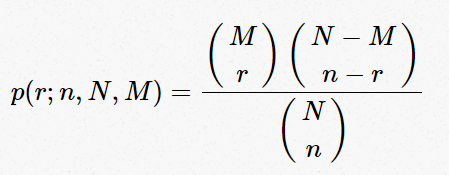

En dónde el valor de r esta limitado por max(0,n−N+M) y min(n,M) inclusive; y los parámetros n (1≤n≤N), N (N≥1) y M (M≥1) son todos números enteros.

La Distribución Hipergeométrica describe experimentos en donde se seleccionan los elementos al azar sin reemplazo (se evita seleccionar el mismo elemento más de una vez). 

Supongamos que tenemos N elementos de los cuales M tienen un cierto atributo (y N−M no tiene). Si escogemos n elementos al azar sin reemplazo, p(r) es la probabilidad de que exactamente r de los elementos seleccionados provienen del grupo con el atributo.

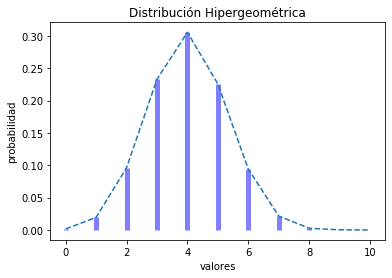

In [52]:
# Graficando Hipergeométrica
M, n, N = 30, 10, 12 # parametros de forma 
hipergeometrica = hypergeom(M, n, N) # Distribución
x = np.arange(0, n+1)
fmp = hipergeometrica.pmf(x) # Función de Masa de Probabilidad
plt.plot(x, fmp, '--')
plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
plt.title('Distribución Hipergeométrica')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

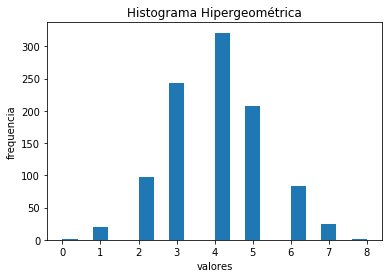

In [48]:
# histograma
aleatorios = hipergeometrica.rvs(1000)  # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Hipergeométrica')
plt.show()

# Distribuciones continuas

En ellas a diferencia de lo que veíamos antes, la variable puede tomar cualquier valor dentro de un intervalo específico.

## Distribución de Normal o Distribución de Gauss

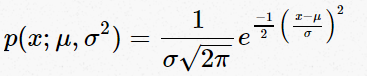

En dónde μ es el parámetro de ubicación, y va a ser igual a la media aritmética y σ2 es el desvío estándar. Algunos ejemplos de variables asociadas a fenómenos naturales que siguen el modelo de la Distribución Normal son:

* características morfológicas de individuos, como la estatura;
* características sociológicas, como el consumo de cierto producto por un mismo grupo de individuos;
* características psicológicas, como el cociente intelectual;
* nivel de ruido en telecomunicaciones;
* errores cometidos al medir ciertas magnitudes;

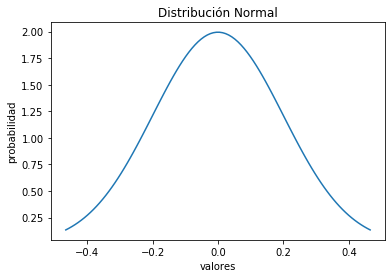

In [63]:
# Graficando Normal
mu, sigma = 0, 0.2 # media y desvio estandar
normal = norm(mu, sigma)
x = np.linspace(normal.ppf(0.01),
                normal.ppf(0.99), 100)
fp = normal.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Normal')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

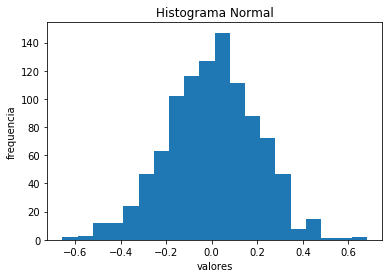

In [64]:
# histograma
aleatorios = normal.rvs(1000) # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Normal')
plt.show()

## Distribución Uniforme

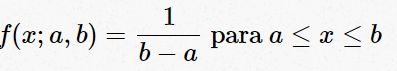

Su función de distribución es:

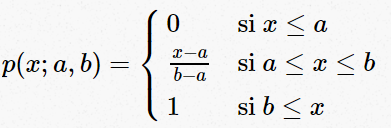

Todos los valore tienen prácticamente la misma probabilidad.

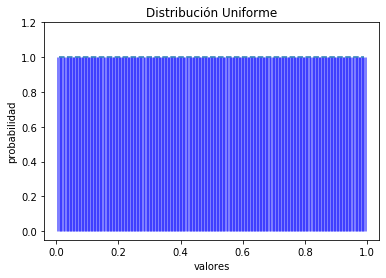

In [66]:
# Graficando Uniforme
uniforme = uniform()
x = np.linspace(uniforme.ppf(0.01),
                uniforme.ppf(0.99), 100)
fp = uniforme.pdf(x) # Función de Probabilidad
fig, ax = plt.subplots()
ax.plot(x, fp, '--')
ax.vlines(x, 0, fp, colors='b', lw=5, alpha=0.5)
ax.set_yticks([0., 0.2, 0.4, 0.6, 0.8, 1., 1.2])
plt.title('Distribución Uniforme')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

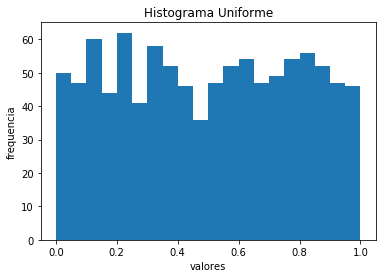

In [67]:
# histograma
aleatorios = uniforme.rvs(1000) # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Uniforme')
plt.show()

## Distribución de Log-normal

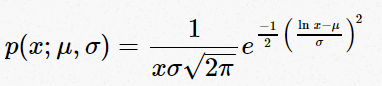

En dónde la variable x>0 y los parámetros μ y σ>0 son todos números reales.

La Distribución Log-normal es aplicable a variables aleatorias que están limitadas por cero, pero tienen pocos valores grandes. Es una distribución con asimetría positiva.

* El peso de los adultos.
* La concentración de los minerales en depósitos.
* Duración de licencia por enfermedad.
* Distribución de riqueza
* Tiempos muertos de maquinarias.

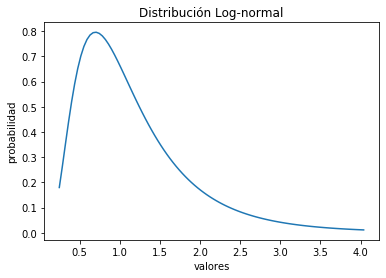

In [71]:
# Graficando Log-Normal
sigma = 0.6 # parametro
lognormal = lognorm(sigma)
x = np.linspace(lognormal.ppf(0.01),
                lognormal.ppf(0.99), 100)
fp = lognormal.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Log-normal')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

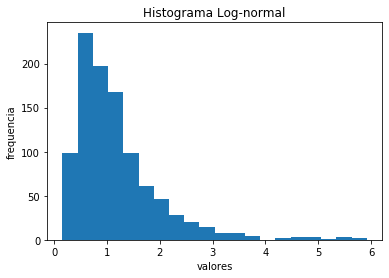

In [72]:
# histograma
aleatorios = lognormal.rvs(1000) # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Log-normal')
plt.show()

## Distribución de Exponencial

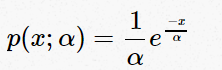

En dónde tanto la variable x como el parámetro α son números reales positivos.

La Distribución Exponencial tiene bastantes aplicaciones, tales como la **desintegración de un átomo radioactivo** o el tiempo entre eventos en un proceso de Poisson donde los acontecimientos suceden a una velocidad constante.

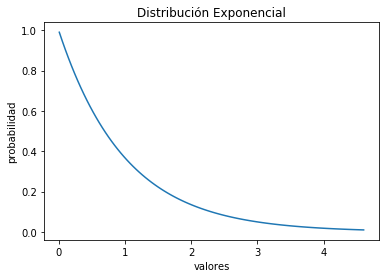

In [76]:
# Graficando Exponencial
exponencial = expon()
x = np.linspace(exponencial.ppf(0.01),
                exponencial.ppf(0.99), 100)
fp = exponencial.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Exponencial')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

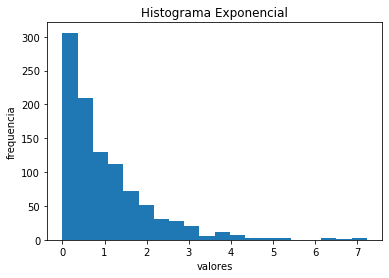

In [77]:
aleatorios = exponencial.rvs(1000) # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Exponencial')
plt.show()

## Distribución Gamma

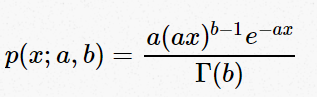

En dónde los parámetros a y b y la variable x son números reales positivos y Γ(b) es la función gamma.

La Distribución Gamma comienza en el origen de coordenadas y tiene una forma bastante flexible. Otras distribuciones son casos especiales de ella.

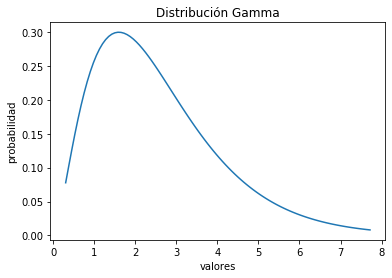

In [79]:
# Graficando Gamma
a = 2.6 # parametro de forma.
gamma = gamma(a)
x = np.linspace(gamma.ppf(0.01),
                gamma.ppf(0.99), 100)
fp = gamma.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Gamma')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

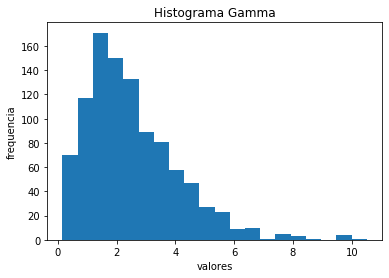

In [80]:
# histograma
aleatorios = gamma.rvs(1000) # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Gamma')
plt.show()

## Distribución Beta

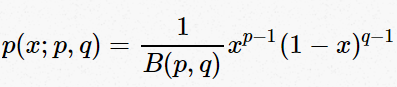

* En inferencia estadística Bayesiana, una **distribución de probabilidad a priori** de una cantidad p desconocida, es la distribución de probabilidad que expresa alguna incertidumbre acerca de p antes de tomar en cuenta los datos.

En dónde los parámetros p y q son números reales positivos, la variable x satisface la condición 0≤x≤1 y B(p,q) es la función beta. Las aplicaciones de la Distribución Beta incluyen el modelado de variables aleatorias que tienen un rango finito de a hasta b.

* Distribución de los tiempos de actividad en las redes de proyectos
* Probabilidad a priori para proporciones binomiales en el análisis bayesiano.

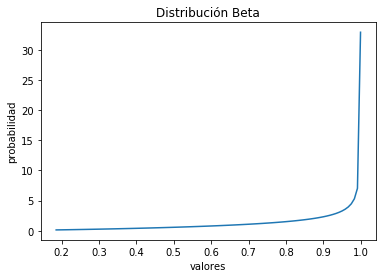

In [87]:
# Graficando Beta
a, b = 2.3, 0.6 # parametros de forma.
beta = beta(a, b)
x = np.linspace(beta.ppf(0.01),
                beta.ppf(0.99), 100)
fp = beta.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Beta')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

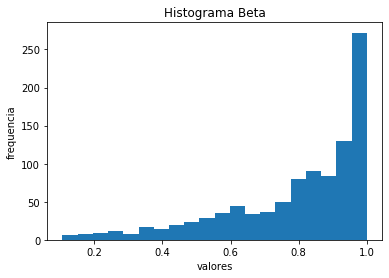

In [88]:
# histograma
aleatorios = beta.rvs(1000) # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Beta')
plt.show()

## Distribución Chi cuadrado

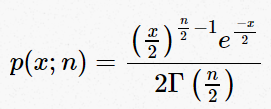

En dónde la variable x≥0 y el parámetro n, el número de grados de libertad, es un número entero positivo. 

Es utilizada para controlar cuan bien se ajustan los valores predichos por el modelo, y los datos realmente observados.

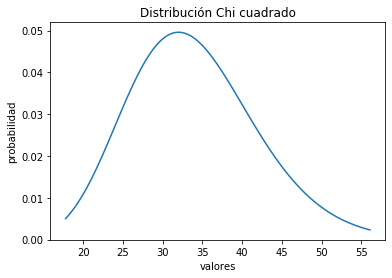

In [91]:
# Graficando Chi cuadrado
df = 34 # parametro de forma.
chi2 = chi2(df)
x = np.linspace(chi2.ppf(0.01),
                chi2.ppf(0.99), 100)
fp = chi2.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Chi cuadrado')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

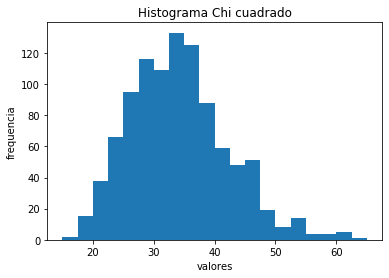

In [92]:
# histograma
aleatorios = chi2.rvs(1000) # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Chi cuadrado')
plt.show()

## Distribución T de Student
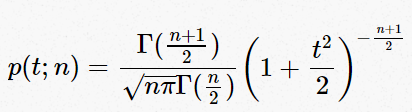

En dónde la variable t es un número real y el parámetro n es un número entero positivo.

Es utilizada para probar si la diferencia entre las medias de dos muestras de observaciones es estadísticamente significativa.

Por ejemplo, las alturas de una muestra aleatoria de los jugadores de baloncesto podría compararse con las alturas de una muestra aleatoria de jugadores de fútbol; esta distribución nos podría ayudar a determinar si un grupo es significativamente más alto que el otro.

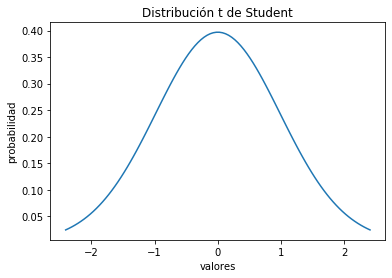

In [96]:
# Graficando t de Student
df = 50 # parametro de forma.
t = t(df)
x = np.linspace(t.ppf(0.01),
                t.ppf(0.99), 100)
fp = t.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución t de Student')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

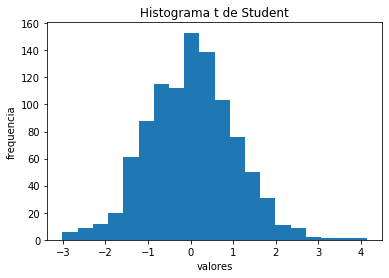

In [97]:
# histograma
aleatorios = t.rvs(1000) # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma t de Student')
plt.show()

## Distribución de pareto

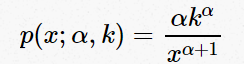

En dónde la variable x≥k y el parámetro α>0 son números reales.

* Explicar la distribución de los salarios en la sociedad.
* La Distribución de Pareto se describe a menudo como la base de la regla 80/20. Por ejemplo, el 80% de las quejas de los clientes con respecto al funcionamiento de su vehículo por lo general surgen del 20% de los componentes.

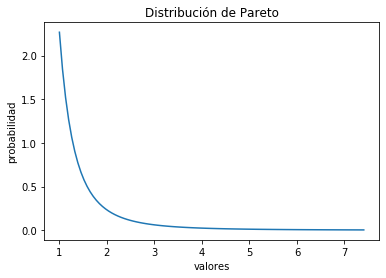

In [99]:
# Graficando Pareto
k = 2.3 # parametro de forma.
pareto = pareto(k)
x = np.linspace(pareto.ppf(0.01),
                pareto.ppf(0.99), 100)
fp = pareto.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución de Pareto')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

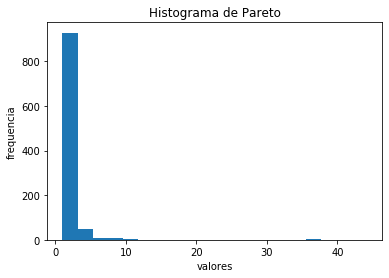

In [100]:
# histograma
aleatorios = pareto.rvs(1000) # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma de Pareto')
plt.show()